In [9]:
from pathlib import Path
from random import shuffle

import matplotlib.pyplot as plt
import pandas as pd

from asi import path_config

csv_root = path_config.lectures / "LectureExercise #1, CSV/csv files"

In [2]:
def filter_path(names: list[str]):
    path_list = list(csv_root.glob("*.csv"))
    path_list = [path.stem.replace(".", " ") for path in csv_root.glob("*.csv")]

    for name in names:
        name = " " + name + " "
        path_list = list(filter(lambda x: name in x, path_list))
    path_list = list(name.replace(" ", "*") + ".csv" for name in path_list)
    found = []
    for pathname in path_list:
        found.extend(list(csv_root.glob(pathname)))
    return found


filter_path(["Lego", "yellow"])

[PosixPath('/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/Lectures+Exercises/LectureExercise #1, CSV/csv files/38 plastic Lego light yellow.Sample.Raw.csv'),
 PosixPath('/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/Lectures+Exercises/LectureExercise #1, CSV/csv files/36 plastic Lego yellow.Sample.Raw.csv')]

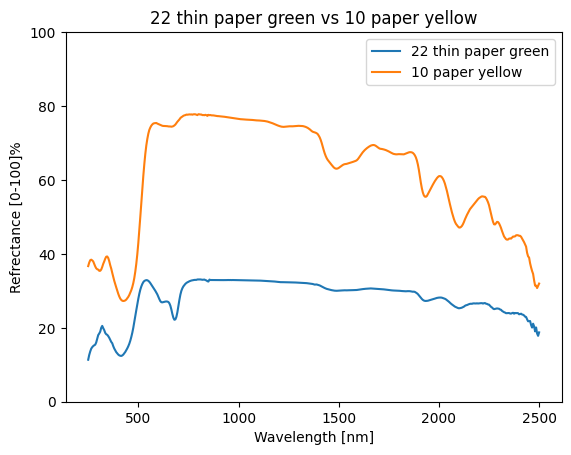

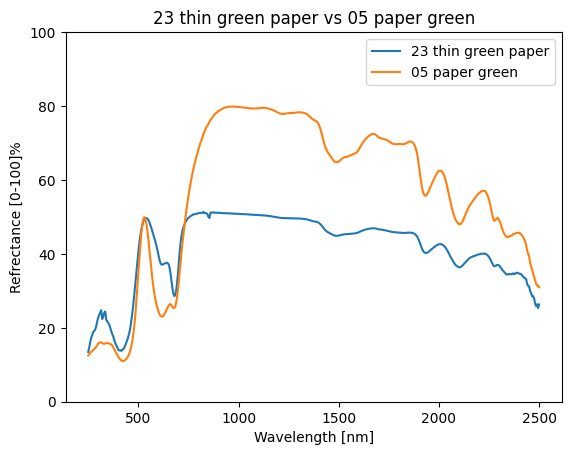

In [15]:
def plot_2materials(path1: Path, path2: Path):
    fig, ax = plt.subplots()

    name1 = path1.stem.split(".")[0]
    df = pd.read_csv(path1)
    x = df["nm"]
    y = df[" %R"]
    ax.plot(x, y, label=name1)

    name2 = path2.stem.split(".")[0]
    df = pd.read_csv(path2)
    x = df["nm"]
    y = df[" %R"]
    ax.plot(x, y, label=name2)

    ax.set_title(f"{name1} vs {name2}")
    ax.set_xlabel("Wavelength [nm]")
    ax.set_ylabel("Refrectance [0-100]%")
    ax.set_ylim(0, 100)
    ax.legend()


def plot_2materials_subtract(path1: Path, path2: Path):
    fig, ax = plt.subplots()

    df = pd.read_csv(path1)
    x = df["nm"]
    y1 = df[" %R"]

    df = pd.read_csv(path2)
    y2 = df[" %R"]

    ax.plot(x, y1 - y2)
    name1 = path1.stem.split(".")[0]
    name2 = path2.stem.split(".")[0]
    ax.set_title(f"{name1} - {name2}")
    ax.set_xlabel("Wavelength [nm]")
    ax.set_ylabel("Refrectance [0-100]%")


paths1 = filter_path(["green", "paper"])
shuffle(paths1)
paths2 = filter_path(["yellow", "paper"])
shuffle(paths2)
plot_2materials(paths1[0], paths2[0])

paths1 = filter_path(["thin green", "paper"])
shuffle(paths1)
paths2 = filter_path(["green", "paper"])
shuffle(paths2)
plot_2materials(paths1[0], paths2[0])

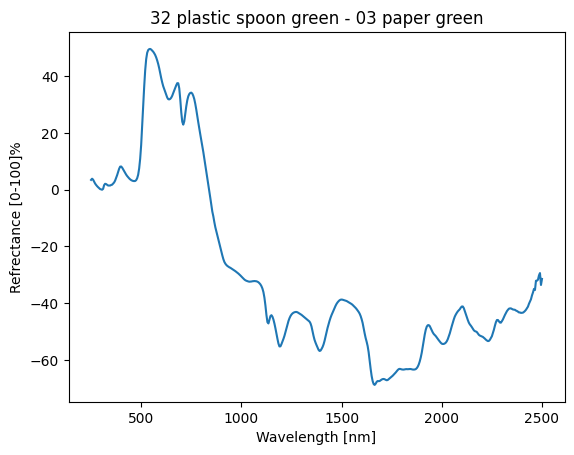

In [19]:

paths = filter_path(["plastic", "green"])
shuffle(paths)
path1 = paths[0]

paths = filter_path(["paper", "green"])
shuffle(paths)
path2 = paths[0]
plot_2materials_subtract(path1, path2)